In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv("diabetes.csv")
df.copy()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
#model ve tahmin

In [6]:
from catboost import CatBoostClassifier

In [7]:
ctb=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 153ms	remaining: 2m 32s
1:	learn: 0.6843414	total: 160ms	remaining: 1m 19s
2:	learn: 0.6805760	total: 166ms	remaining: 55.3s
3:	learn: 0.6765782	total: 170ms	remaining: 42.4s
4:	learn: 0.6720829	total: 174ms	remaining: 34.7s
5:	learn: 0.6681617	total: 178ms	remaining: 29.6s
6:	learn: 0.6641912	total: 181ms	remaining: 25.7s
7:	learn: 0.6602881	total: 185ms	remaining: 22.9s
8:	learn: 0.6562626	total: 187ms	remaining: 20.6s
9:	learn: 0.6528483	total: 190ms	remaining: 18.8s
10:	learn: 0.6487823	total: 192ms	remaining: 17.3s
11:	learn: 0.6454980	total: 194ms	remaining: 16s
12:	learn: 0.6418953	total: 198ms	remaining: 15s
13:	learn: 0.6374431	total: 200ms	remaining: 14.1s
14:	learn: 0.6339676	total: 204ms	remaining: 13.4s
15:	learn: 0.6304252	total: 206ms	remaining: 12.6s
16:	learn: 0.6266998	total: 210ms	remaining: 12.1s
17:	learn: 0.6237660	total: 212ms	remaining: 11.6s
18:	learn: 0.6204394	total: 216ms	remaining: 11.1s
19:	learn: 0.61

In [10]:
y_pred=ctb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [11]:
# model turing

In [12]:
ctb_model=CatBoostClassifier()

In [13]:
ctb_params={"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [14]:
ctb_cv_model=GridSearchCV(ctb_model,ctb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 0.6863312	total: 5.78ms	remaining: 1.15s
1:	learn: 0.6811157	total: 10.6ms	remaining: 1.05s
2:	learn: 0.6752970	total: 15.3ms	remaining: 1s
3:	learn: 0.6697432	total: 19.6ms	remaining: 963ms
4:	learn: 0.6641758	total: 34.1ms	remaining: 1.33s
5:	learn: 0.6576656	total: 38.2ms	remaining: 1.24s
6:	learn: 0.6521870	total: 42.8ms	remaining: 1.18s
7:	learn: 0.6465564	total: 47.6ms	remaining: 1.14s
8:	learn: 0.6407595	total: 52.2ms	remaining: 1.11s
9:	learn: 0.6357725	total: 57.7ms	remaining: 1.09s
10:	learn: 0.6299942	total: 63ms	remaining: 1.08s
11:	learn: 0.6240480	total: 67.6ms	remaining: 1.06s
12:	learn: 0.6196095	total: 71.6ms	remaining: 1.03s
13:	learn: 0.6148715	total: 76.7ms	remaining: 1.02s
14:	learn: 0.6092626	total: 81.2ms	remaining: 1s
15:	learn: 0.6046764	total: 85.2ms	remaining: 980ms
16:	learn: 0.6012725	total: 89.5ms	remaining: 964ms
17:	learn: 0.5958121	total: 93.7ms	remaining: 948ms
18:	learn: 0.590324

In [15]:
ctb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [16]:
ctb_tuned=CatBoostClassifier(depth=8,iterations=200,learning_rate=0.01).fit(X_train,y_train)

0:	learn: 0.6863312	total: 9.1ms	remaining: 1.81s
1:	learn: 0.6811157	total: 17.2ms	remaining: 1.7s
2:	learn: 0.6752970	total: 24.8ms	remaining: 1.63s
3:	learn: 0.6697432	total: 28.9ms	remaining: 1.42s
4:	learn: 0.6641758	total: 33.8ms	remaining: 1.32s
5:	learn: 0.6576656	total: 38.8ms	remaining: 1.25s
6:	learn: 0.6521870	total: 53.9ms	remaining: 1.48s
7:	learn: 0.6465564	total: 86.4ms	remaining: 2.07s
8:	learn: 0.6407595	total: 99.3ms	remaining: 2.11s
9:	learn: 0.6357725	total: 112ms	remaining: 2.13s
10:	learn: 0.6299942	total: 127ms	remaining: 2.19s
11:	learn: 0.6240480	total: 141ms	remaining: 2.21s
12:	learn: 0.6196095	total: 156ms	remaining: 2.24s
13:	learn: 0.6148715	total: 168ms	remaining: 2.23s
14:	learn: 0.6092626	total: 175ms	remaining: 2.16s
15:	learn: 0.6046764	total: 181ms	remaining: 2.08s
16:	learn: 0.6012725	total: 186ms	remaining: 2s
17:	learn: 0.5958121	total: 195ms	remaining: 1.98s
18:	learn: 0.5903243	total: 209ms	remaining: 1.99s
19:	learn: 0.5866024	total: 216ms	rem

In [17]:
y_pred=ctb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

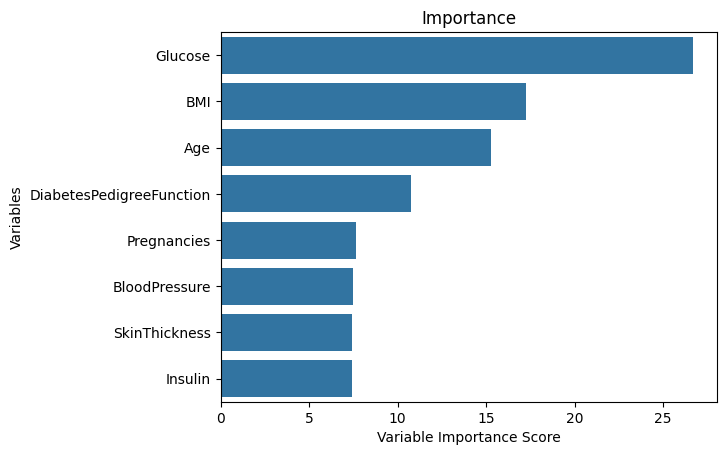

In [18]:
feature_imp = pd.Series(ctb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [ ]:
#tüm 
modeller = [knn_tuned,
           loj_model,
           svm_tuned,
           mlp_tuned,
           cart_tuned,
           rf_tuned,
           gbm_tuned,
           catb_tuned,
           lgb_tuned,
            xgb_tuned]
sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller","Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]],columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

In [19]:
sns.barplot(x="Accuracy",y="Modeller",data=sonuclar,color="b")
plt.xlabel("Accuracy Yüzde")
plt.title("Doğruluk Oranları");


NameError: name 'sonuclar' is not defined

In [20]:
sonuclar

NameError: name 'sonuclar' is not defined